**IMPORT LIBRARIES**

In [216]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


**LOAD THE DATASET**

In [217]:
data= pd.read_csv('/content/data_insurance (1).csv') #read the csv file, load into dataset

**EXPLORE DATA**


In [218]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


TOP 5 ROWS OF DATA

In [219]:
data.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Dataset Information and Statistics

In [220]:
data.shape

(1338, 7)

In [221]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [222]:
data.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


**HANDLING/CHECKING MISSING VALUES**

In [223]:
data.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [224]:
data.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


no missing values are there

**CONVERT CATEGORICAL VARIABLES**

In [225]:
data['sex'].unique()

array(['female', 'male'], dtype=object)

In [226]:
data['sex']=data['sex'].map({'female':0,'male':1})
data['smoker']=data['smoker'].map({'yes':1,'no':0})
data['region']=data['region'].map({'southwest':1,'southeast':2,
                   'northwest':3,'northeast':4})


In [227]:
data.head() #dataset after converting categorical data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


**DEFINE FEATURES ANND TARGET**

In [228]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [229]:
X= data.drop(['charges'],axis=1)
y= data['charges']

In [230]:
  X.head() #top 5 rows of features

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,1
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,3
4,32,1,28.880,0,0,3


In [231]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_X = scaler.fit_transform(X) #for normalizing the values in features
normalized_X = pd.DataFrame(normalized_X, columns=['age', 'sex', 'bmi', 'children', 'smoker', 'region'])

In [232]:
normalized_X.head() #normalized values of feaatures

,age,sex,bmi,children,smoker,region
0,0.021739,0.0,0.321227,0.0,1.0,0.000000
1,0.000000,1.0,0.479150,0.2,0.0,0.333333
2,0.217391,1.0,0.458434,0.6,0.0,0.333333
3,0.326087,1.0,0.181464,0.0,0.0,0.666667
4,0.304348,1.0,0.347592,0.0,0.0,0.666667


In [233]:
y.head() #actual y values (charges)

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


**SPLIT DATASET**

In [234]:
X_train, X_test, y_train, y_test = train_test_split(normalized_X,y,test_size=0.2,random_state=1320)

In [235]:
print(X_train.shape)

(1070, 6)


SAMPLE IMPLEMENTATION WITH SCIKIT LEARN, NOT TO BE EVALUATED

Train MSE: 38223714.8980244
Test MSE: 29945712.405337136


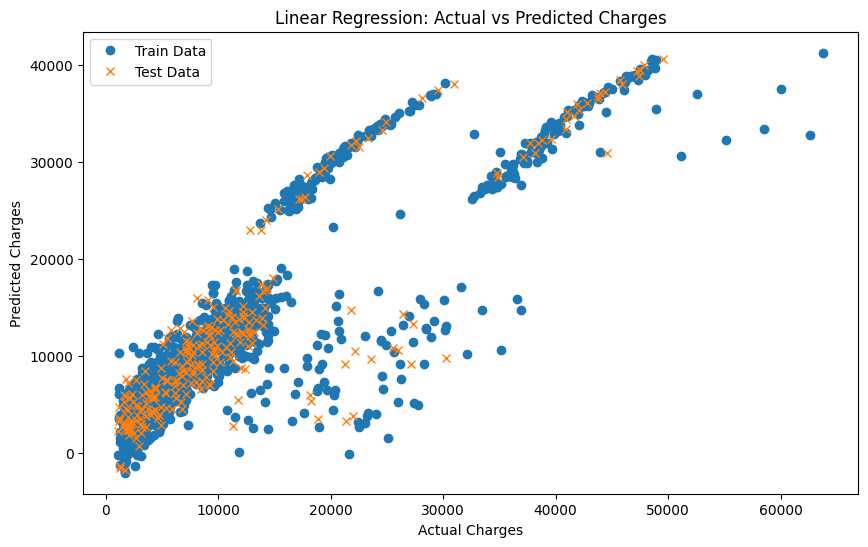

In [236]:

from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


# Step 1:train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 2: Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Step 3: Calculate Mean Squared Error (MSE) for train and test sets
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"Train MSE: {mse_train}")
print(f"Test MSE: {mse_test}")

# Step 4: Plot actual and predicted values for train and test data
plt.figure(figsize=(10, 6))
plt.plot(y_train, y_train_pred, 'o', label='Train Data')
plt.plot(y_test, y_test_pred, 'x', label='Test Data')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Linear Regression: Actual vs Predicted Charges')
plt.legend()
plt.show()


MODEL IMPLEMENTATIONN WITH DELTA RULE (Y VALUES KEPT SAME)

6
Epoch 0: Train MSE = 329208484.835189, Test MSE = 292034981.2637145
Epoch 100: Train MSE = 126355503.75820076, Test MSE = 107842068.59982412
Epoch 200: Train MSE = 89030287.51508215, Test MSE = 75692490.31582344
Epoch 300: Train MSE = 73874560.91022412, Test MSE = 62588938.25458148
Epoch 400: Train MSE = 64199465.611625545, Test MSE = 53971101.234883964
Epoch 500: Train MSE = 57337456.51094287, Test MSE = 47740673.20023
Epoch 600: Train MSE = 52379837.699007064, Test MSE = 43185581.899166204
Epoch 700: Train MSE = 48782813.97731558, Test MSE = 39849575.21020324
Epoch 800: Train MSE = 46167237.78782544, Test MSE = 37401736.205485016
Epoch 900: Train MSE = 44261500.25178186, Test MSE = 35600852.46999928
Epoch 1000: Train MSE = 42870011.039226, Test MSE = 34271798.8577148
Epoch 1100: Train MSE = 41851658.08422196, Test MSE = 33287610.07030339
Epoch 1200: Train MSE = 41104491.94260432, Test MSE = 32556184.350820407
Epoch 1300: Train MSE = 40554757.694310755, Test MSE = 32010604.715271886

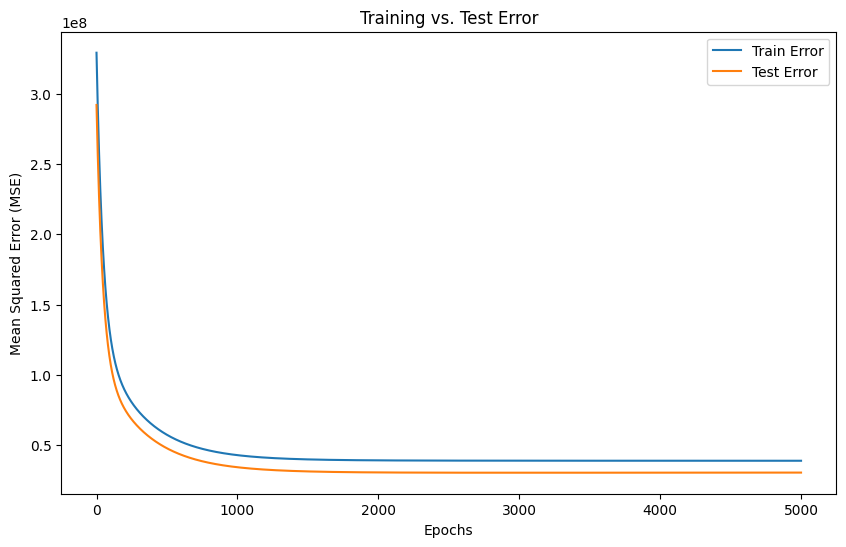

In [237]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split




# Step 1: initialize weights and model parameters
n_features = X_train.shape[1]
print(n_features)
weights = np.zeros(n_features) # Initialize weights to zeros
learning_rate = 0.01 # Initial learning rate
n_epochs = 5000

# creating arrays to store train and test errors
train_errors = []
test_errors = []

# Step 2: Train the model
for epoch in range(n_epochs):
    # Calculate predictions for the training set
    y_train_pred = np.dot(X_train, weights)

    # Compute error for training set
    error_train = y_train - y_train_pred

    # Updating weights using Delta Rule
    weights += learning_rate * np.dot(error_train, X_train) / len(X_train)

    # Calculate training error (MSE)
    mse_train = mean_squared_error(y_train, y_train_pred)
    train_errors.append(mse_train) #appending value of MSE to array

    # Calculate predictions for the test set
    y_test_pred = np.dot(X_test, weights)

    # Calculate test error (MSE)
    mse_test = mean_squared_error(y_test, y_test_pred)
    test_errors.append(mse_test) #appending value of MSE to array

    # print the errors every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Train MSE = {mse_train}, Test MSE = {mse_test}")

# Step 3: Plot train vs test errors
plt.figure(figsize=(10, 6))
plt.plot(range(n_epochs), train_errors, label='Train Error')
plt.plot(range(n_epochs), test_errors, label='Test Error')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Training vs. Test Error')
plt.legend()
plt.show()



Model Metrics on Train Dataset, with final trained WEIGHTS

In [238]:
y_pred_final = np.dot(X_train, weights)
mse_final = mean_squared_error(y_train, y_pred_final)
r2_final = r2_score(y_train, y_pred_final)

print(f"Final MSE: {mse_final}")
print(f"Final R-squared: {r2_final}")
print("Final Weights:", weights)

Final MSE: 38887880.53214453
Final R-squared: 0.7379588577893812
Final Weights: [10809.0648848   -615.46779507  9233.44465059  1394.10763562
 23447.7006117    195.54758135]


**PREDICTIONS ON TEST DATASET**

making predictions, and model metrics (MSE, Rsquared for test data)

In [239]:
y_pred_test = np.dot(X_test, weights)
mse_final = mean_squared_error(y_test, y_pred_test)
r2_final = r2_score(y_test, y_pred_test)

print(f"Final MSE: {mse_final}")
print(f"Final R-squared: {r2_final}")
print("Final Weights:", weights)


Final MSE: 30467208.62733673
Final R-squared: 0.7800134652561277
Final Weights: [10809.0648848   -615.46779507  9233.44465059  1394.10763562
 23447.7006117    195.54758135]


ACTUAL VALUES OF CHARGES (TEST DATASET)

In [240]:
  y_test #actual values of CHARGES

,charges
761,2416.95500
1003,21232.18226
1076,8551.34700
771,11150.78000
66,14235.07200
...,...
14,39611.75770
327,42760.50220
137,2045.68525
1077,2102.26470


Values of CHARGES PREDICTED BY THE MODEL (ON TEST DATASET)

In [241]:
y_pred_test = pd.DataFrame(y_pred_test)
y_pred_test #PREDICTED VALUES OF CHARGES USING MODEL TRAINED ON TRAIN SET

,0
0,5617.683757
1,9822.251242
2,11077.747796
3,11449.867942
4,16410.004309
...,...
263,31513.153734
264,34962.090068
265,2743.925239
266,2786.519678


**EVALUATE MODEL**

In [242]:
#FOR PREDICTION OF NORMALIZED CHARGES
print(f"Final MSE: {mse_final}")
print(f"Final R-squared: {r2_final}")

Final MSE: 30467208.62733673
Final R-squared: 0.7800134652561277


**ANALYZE MODEL COEFFICIENTS**

In [243]:
print("Final Weights:", weights)
print("Age :", weights[0])
print("Sex :", weights[1])
print("BMI :", weights[2])
print("Children :", weights[3])
print("Smoker :", weights[4])
print("Region :", weights[5])

Final Weights: [10809.0648848   -615.46779507  9233.44465059  1394.10763562
 23447.7006117    195.54758135]
Age : 10809.06488480174
Sex : -615.4677950653277
BMI : 9233.444650593687
Children : 1394.107635623137
Smoker : 23447.700611696007
Region : 195.54758135413553


**TRAINING THE MODEL ON NORMALIZED VALUES FOR CHARGES**

Normalizing the complete dataset

In [244]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = scaler.fit_transform(data)
data = pd.DataFrame(data, columns=['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'])

In [245]:
data.head() #normalized complete dataset

,age,sex,bmi,children,smoker,region,charges
0,0.021739,0.0,0.321227,0.0,1.0,0.000000,0.251611
1,0.000000,1.0,0.479150,0.2,0.0,0.333333,0.009636
2,0.217391,1.0,0.458434,0.6,0.0,0.333333,0.053115
3,0.326087,1.0,0.181464,0.0,0.0,0.666667,0.333010
4,0.304348,1.0,0.347592,0.0,0.0,0.666667,0.043816


splitting normalized dataset into x and y

In [246]:
X= data.drop(['charges'],axis=1)
y= data['charges']

In [247]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1320) #splitting of NORMALIZED X and NORMALIZED y values into train and test data

TRAINING THE MODEL ON NORMALIZED DATA FOR BOTH X AND Y (NORMALIZED CHARGES VALUES)

6
Epoch 0: Train MSE = 0.07651183981714019, Test MSE = 0.0676970449537839
Epoch 100: Train MSE = 0.03135001363042555, Test MSE = 0.026863598476560595
Epoch 200: Train MSE = 0.02259041856444157, Test MSE = 0.01933397478044756
Epoch 300: Train MSE = 0.018842367067823912, Test MSE = 0.016081427399257393
Epoch 400: Train MSE = 0.01641263753865125, Test MSE = 0.013908155550370867
Epoch 500: Train MSE = 0.01468483919291831, Test MSE = 0.01233268244355287
Epoch 600: Train MSE = 0.013436236918903768, Test MSE = 0.011179753194754291
Epoch 700: Train MSE = 0.012530550306200303, Test MSE = 0.01033462404262074
Epoch 800: Train MSE = 0.011872322778045528, Test MSE = 0.009713864550967585
Epoch 900: Train MSE = 0.011393093149213785, Test MSE = 0.009256641338021666
Epoch 1000: Train MSE = 0.011043535334917514, Test MSE = 0.008918769705525341
Epoch 1100: Train MSE = 0.010788050060744778, Test MSE = 0.008668197053699986
Epoch 1200: Train MSE = 0.010600912194890864, Test MSE = 0.00848165681447577
Epoch 1

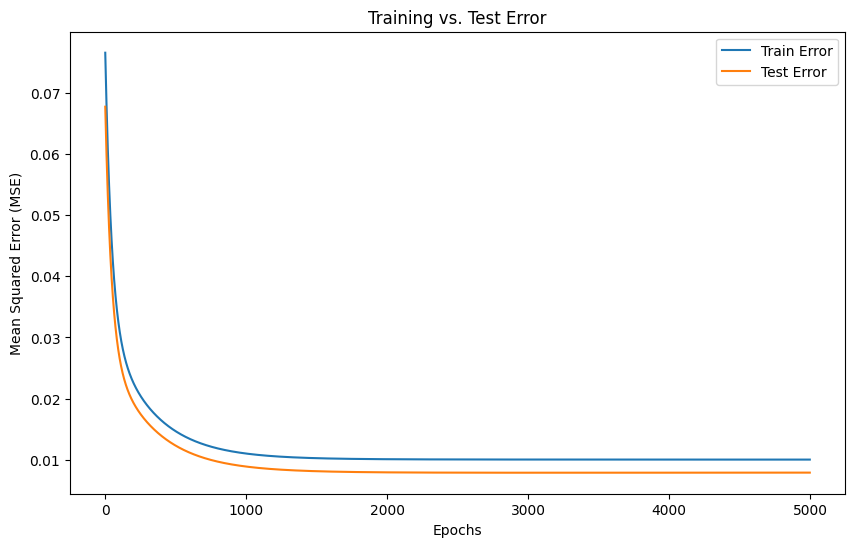

In [248]:
# Step 1: initialize weights and model parameters
n_features = X_train.shape[1]
print(n_features)
weights_norm = np.zeros(n_features) # Initialize weights to zeros
learning_rate = 0.01 # Initial learning rate
n_epochs = 5000

# creating arrays to store train and test errors
train_errors = []
test_errors = []

# Step 2: Train the model
for epoch in range(n_epochs):
    # Calculate predictions for the training set
    y_train_pred = np.dot(X_train, weights_norm)

    # Compute error for training set
    error_train = y_train - y_train_pred

    # Updating weights using Delta Rule
    weights_norm += learning_rate * np.dot(error_train, X_train) / len(X_train)

    # Calculate training error (MSE)
    mse_train = mean_squared_error(y_train, y_train_pred)
    train_errors.append(mse_train) #appending value of MSE to array

    # Calculate predictions for the test set
    y_test_pred = np.dot(X_test, weights_norm)

    # Calculate test error (MSE)
    mse_test = mean_squared_error(y_test, y_test_pred)
    test_errors.append(mse_test) #appending value of MSE to array

    # print the errors every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Train MSE = {mse_train}, Test MSE = {mse_test}")

# Step 3: Plot train vs test errors
plt.figure(figsize=(10, 6))
plt.plot(range(n_epochs), train_errors, label='Train Error')
plt.plot(range(n_epochs), test_errors, label='Test Error')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Training vs. Test Error')
plt.legend()
plt.show()


Model Metrics on Train Dataset, with final trained WEIGHTS

In [249]:
y_pred_final = np.dot(X_train, weights_norm)
mse_final_norm = mean_squared_error(y_train, y_pred_final)
r2_final_norm = r2_score(y_train, y_pred_final)

print(f"Final MSE: {mse_final_norm}")
print(f"Final R-squared: {r2_final_norm}")
print("Final Weights:", weights_norm)

Final MSE: 0.010058058838349686
Final R-squared: 0.7339939671957885
Final Weights: [ 0.16630469 -0.01259408  0.12848236  0.01743925  0.37243381 -0.00358605]


**PREDICTIONS ON TEST DATASET**

making predictions, and model metrics (MSE, Rsquared for test data)

In [250]:
y_pred_test = np.dot(X_test, weights_norm)
mse_final_norm = mean_squared_error(y_test, y_pred_test)
r2_final_norm = r2_score(y_test, y_pred_test)

print(f"Final MSE: {mse_final_norm}")
print(f"Final R-squared: {r2_final_norm}")
print("Final Weights:", weights_norm)


Final MSE: 0.007929814148507297
Final R-squared: 0.7752764714120477
Final Weights: [ 0.16630469 -0.01259408  0.12848236  0.01743925  0.37243381 -0.00358605]


ACTUAL VALUES OF CHARGES (TEST DATASET) NORMALIZED

In [251]:
  y_test #actUAL values of CHARGES(NORMALIZED)

,charges
761,0.020672
1003,0.321002
1076,0.118590
771,0.160082
66,0.209314
...,...
14,0.614378
327,0.664638
137,0.014746
1077,0.015649


In [252]:
y_pred_test = pd.DataFrame(y_pred_test)
y_pred_test #PREDICTED VALUES OF NORMALIZED CHARGES USING MODEL TRAINED ON TRAIN SET

,0
0,0.075476
1,0.143014
2,0.163776
3,0.170636
4,0.242420
...,...
263,0.481642
264,0.532968
265,0.031329
266,0.029474


**EVALUATE MODEL** (NORMALIZED CHARGES VALUES)

In [253]:
#FOR PREDICTION OF NORMALIZED CHARGES
print(f"Final MSE: {mse_final_norm}")
print(f"Final R-squared: {r2_final_norm}")

Final MSE: 0.007929814148507297
Final R-squared: 0.7752764714120477


**ANALYZE MODEL COEFFICIENTS (NORMALIZED CHARGES VALUES)**

In [254]:
print("Final Weights:", weights_norm)
print("Age :", weights_norm[0])
print("Sex :", weights_norm[1])
print("BMI :", weights_norm[2])
print("Children :", weights_norm[3])
print("Smoker :", weights_norm[4])
print("Region :", weights_norm[5])

Final Weights: [ 0.16630469 -0.01259408  0.12848236  0.01743925  0.37243381 -0.00358605]
Age : 0.1663046933597738
Sex : -0.012594079183615322
BMI : 0.12848235946361633
Children : 0.017439252043892062
Smoker : 0.3724338084181907
Region : -0.0035860459865620976
